.[mport Libraries, Functions and Data](#1)<br>
.[Data Cleaning](#2)<br>
.[Data Exploration](#3)<br>
.[asking questions and replaying to it](#4)


.<a id=1><h1 align='center'><font color='#2B547E'> Import Libraries, Functions and Data</font> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
import plotly.graph_objects as go
import plotly.express as px# Data visualization
from IPython.display import display
import os

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.
# pd.set_option('display.max_colwidth', -1) # will help to show all the text strings in the column.

In [3]:
data=pd.read_csv("movie.csv",lineterminator='\n')

In [4]:
data.iloc[[*range(5)],[*range(0,3),*range(-3,0)]]

,Release_Date,Title,Overview,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
data.shape

(9827, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
data.groupby(["Title"])["Popularity"].max().sort_values(ascending=False)[:5]

Title
Spider-Man: No Way Home    5083.95
The Batman                 3827.66
No Exit                    2618.09
Encanto                    2402.20
The King's Man             1895.51
Name: Popularity, dtype: float64

.<a id=2><h1 align='center'><font color='#2B547E'> Data cleaning</font> 

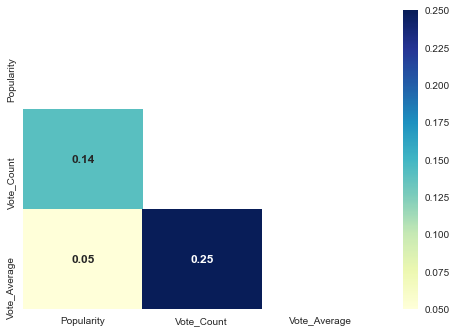

In [8]:
x = data.corr()
y = np.round(x,2);
# Can be great to plot only a half matrix  
# Generate a mask for the upper triangle
mask = np.zeros_like(x)
mask[np.triu_indices_from(mask)] = True 
plt.show(sns.heatmap(y,annot = True,cmap="YlGnBu",mask=mask,annot_kws={"fontsize":12, "weight":'bold'}).set_facecolor('white'));

<strong><font color='#2B547E'>changing the data types</font></strong>

In [9]:
#changing the object to date_time
data["Release_Date"]=pd.to_datetime(data["Release_Date"])
data["release_year"]=pd.to_datetime(data["Release_Date"]).dt.year
data["release_year"]=data["release_year"].astype("category")

In [10]:
#changing all object type into catogry type
x=data.select_dtypes(include=[object])
for i in x.columns:
    data=data.astype({i:'category'},errors='raise')

In [11]:
#checking for missing values
np.round(data.isnull().sum()*100.00/len(data),2)

Release_Date         0.0
Title                0.0
Overview             0.0
Popularity           0.0
Vote_Count           0.0
Vote_Average         0.0
Original_Language    0.0
Genre                0.0
Poster_Url           0.0
release_year         0.0
dtype: float64

>as we see we donn have any missing values in our dataset 

<strong><font color='blue'>dropping the useless column</font></strong>

In [12]:
data.drop(["Poster_Url"],axis=1,inplace=True)

<strong><font color='blue'>checking for outlairs</font></strong>

In [13]:
numeric_data=data.select_dtypes(exclude=["category"])

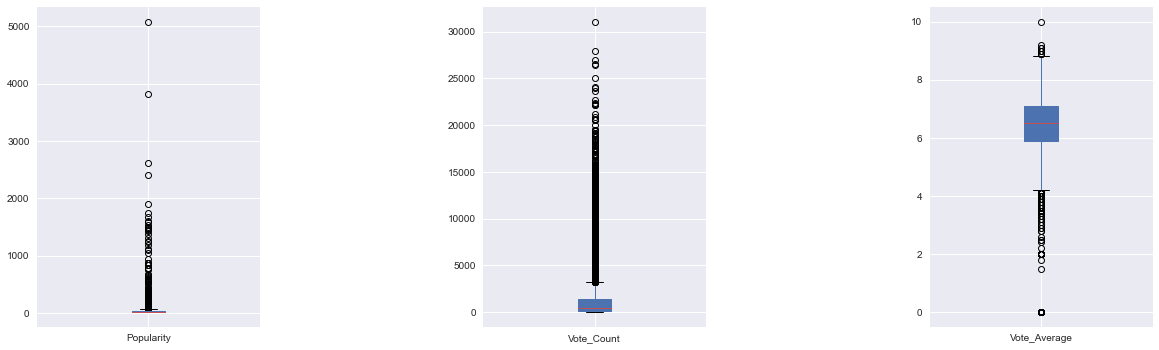

In [14]:
numeric_data.plot(subplots =True, kind = 'box', layout = (3,3), figsize = (20,20),patch_artist=True)
plt.subplots_adjust(wspace = 1)

In [15]:
def out_lairs(col):
    """
    this function take the name of column and compute the median(Q2)represent 50% percentage
    and also compute the Q3(75%)from the boxblot then compute the inter_quantile_range 
    and then we compute the upper limit and the lowerlimit to show the origin of the outlairs
    
    """
    Q1 = data[col].quantile(0.25)
    Q3 =  data[col].quantile(0.75)
    IQR = Q3-Q1
    data_out = data.loc[(data[col] < (Q1-1.5*IQR)) | (data[col] > (Q3+1.5*IQR))][:10]
    
    return data_out 

In [16]:
def imputing_outlairs(col):
    """"
  this fun take the col and impute the values that more than 95 with median values bc its not sensative to outlairs  
    """
    x=data[col].quantile(0.50)
    y=data[col].quantile(0.99)
    data[col] = np.where(data[col] >y, x, data[col])

In [17]:
out_lairs("Popularity")

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,release_year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.95,8940,8.3,en,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.66,1151,8.1,en,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.09,122,6.3,en,Thriller,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.20,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.51,1793,7.0,en,"Action, Adventure, Thriller, War",2021
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.48,33,6.6,en,"Action, Crime, Thriller",2022
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.16,821,6.8,en,"Horror, Mystery, Thriller",2022
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.78,206,6.3,en,Thriller,2022
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.01,114,5.3,en,"Action, Crime, Fantasy",2022
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.41,4726,7.2,en,Science Fiction,2021


>after seeing the origin of outlairs based on other columns like Vote_Average and also title that these outlairs values not wrong cuz some fims has a big popularity along the years like the series of spider man with a proof that many series were made of it and its popularity has increased along the years on the other hand there are some films have least popularity 

In [18]:
out_lairs("Vote_Count")

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,release_year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.95,8940,8.3,en,"Action, Adventure, Science Fiction",2021
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.20,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.41,4726,7.2,en,Science Fiction,2021
22,2021-09-30,Venom: Let There Be Carnage,After finding a host body in investigative rep...,1053.62,6539,7.1,en,"Science Fiction, Action, Adventure",2021
31,2021-09-01,Shang-Chi and the Legend of the Ten Rings,Shang-Chi must confront the past he thought he...,769.18,5845,7.7,en,"Action, Adventure, Fantasy",2021
49,2021-08-11,Free Guy,A bank teller called Guy realizes he is a back...,447.87,5158,7.7,en,"Comedy, Action, Adventure, Science Fiction",2021
50,2021-05-26,Cruella,In 1970s London amidst the punk rock revolutio...,429.61,6675,8.2,en,"Comedy, Crime",2021
51,2021-07-28,The Suicide Squad,"Supervillains Harley Quinn, Bloodsport, Peacem...",424.98,5689,7.7,en,"Action, Adventure, Fantasy",2021
54,2021-06-17,Luca,Luca and his best friend Alberto experience an...,408.75,5886,8.0,en,"Animation, Comedy, Family, Fantasy",2021
55,2021-04-07,Mortal Kombat,"Washed-up MMA fighter Cole Young, unaware of h...",402.27,4447,7.2,en,"Action, Fantasy, Adventure",2021


>as we see that the films that have high popularity have also high viwers and this make asense for me that the more popularity you have will attract the more people to watch the film 

In [19]:
imputing_outlairs("Vote_Count")

In [20]:
out_lairs("Vote_Average")

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,release_year
77,2022-02-04,"Sex, Shame and Tears 2",Twenty years have passed since those two apart...,325.62,5.0,2.2,es,"Comedy, Drama",2022
80,2022-03-30,Sonic the Hedgehog 2,"After settling in Green Hills, Sonic is eager ...",317.16,0.0,0.0,en,"Action, Science Fiction, Comedy, Family",2022
210,2023-04-06,Fast & Furious 10,The tenth installment in the Fast Saga.,181.22,0.0,0.0,en,"Action, Crime",2023
229,2021-12-25,El Paseo 6,The last year High School excursion is the wal...,170.87,5.0,3.5,es,Comedy,2021
231,2022-04-22,Dragon Ball Super: Super Hero,"The Red Ribbon Army, an evil organization that...",170.55,0.0,0.0,ja,"Animation, Science Fiction, Action",2022
232,2022-08-25,After Ever Happy,The fourth installment in The After Universe. ...,169.96,0.0,0.0,en,Romance,2022
243,1986-01-18,Beautiful Sisters: Flesh Slave,A maniac breaks into the apartment of two sist...,167.25,4.0,4.0,ja,"Crime, Horror",1986
308,2021-10-27,Nobody Sleeps in the Woods Tonight 2,When something horrible happens to the only su...,148.01,148.0,4.0,pl,"Horror, Thriller, Comedy",2021
314,2022-03-17,The Bad Guys,When the infamous Bad Guys are finally caught ...,146.55,0.0,0.0,en,"Animation, Comedy, Action, Family, Crime",2022
322,2022-05-04,Doctor Strange in the Multiverse of Madness,"Doctor Strange, with the help of mystical alli...",144.13,0.0,0.0,en,"Fantasy, Action, Adventure",2022


>as we see that some films have low popularity,votecount,voteaverage that makes sense that cuz there are some films got low rate and make the people get depressed(we notice that the fims will be shown in <strong><font color='blue'>2022and2023</font></strong> hasn'tshown yet and its make a sense that it not have a vote may be this  dateset was collected in in at the beginning of<strong><font color='blue'>2022</font></strong> 

In [21]:
#so am gonna delete it bc it will not be useful for me it not make asense to make a recommendation to films hven't shown yet
data=data[data["Vote_Average"]!=0.0]
imputing_outlairs("Vote_Average")


In [22]:
most_popularity=data.groupby(["Title"])["Vote_Average"].max().sort_values(ascending=False)[:5]
most_popularity

Title
Demon Slayer -Kimetsu no Yaiba- The Movie: Mugen Train                 8.4
KonoSuba: God's Blessing on this Wonderful World! Legend of Crimson    8.4
The Great Dictator                                                     8.4
Harakiri                                                               8.4
Ikiru                                                                  8.4
Name: Vote_Average, dtype: float64

.<a id=3><h1 align='center'><font color='#2B547E'> Data Exploration</font> 

<strong><font color='#2B547E'>which film has the most popularity films?</font></strong>

<AxesSubplot:xlabel='Title'>

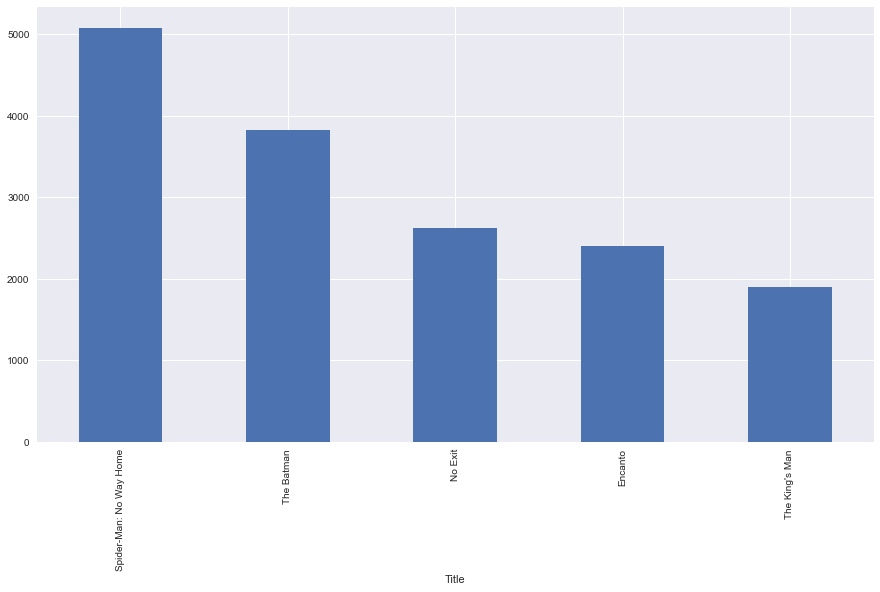

In [23]:
most_popularity=data.groupby(["Title"])["Popularity"].max().sort_values(ascending=False)[:5]
most_popularity.plot.bar(figsize=(15,8))

<strong><font color='#2B547E'>which film has the highest rate ?</font></strong>

<AxesSubplot:xlabel='Title'>

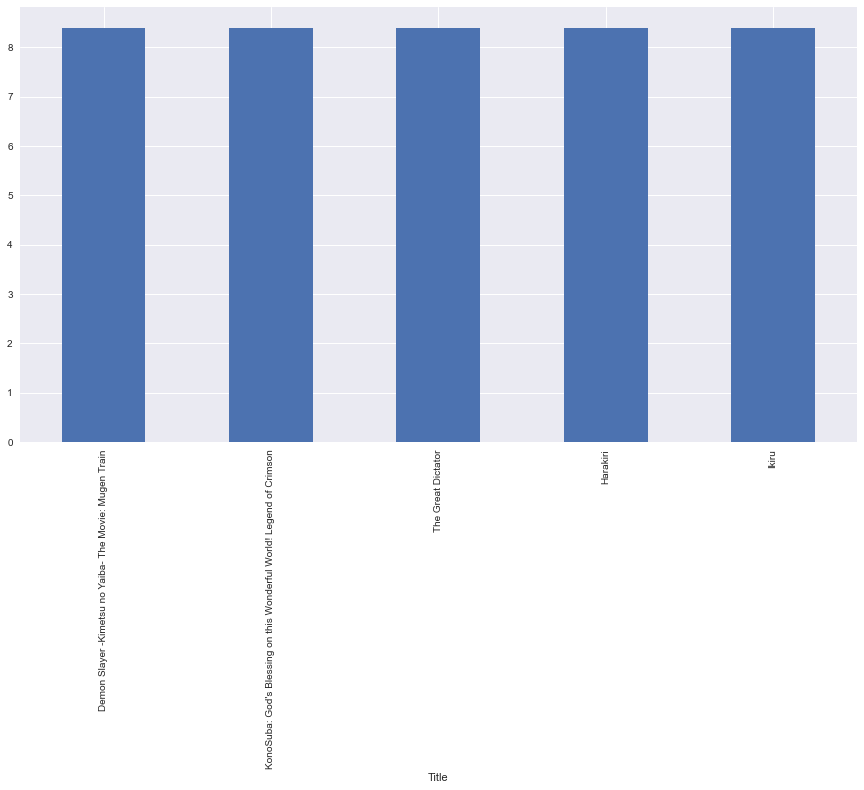

In [24]:
most_popularity=data.groupby(["Title"])["Vote_Average"].max().sort_values(ascending=False)[:5]
most_popularity.plot.bar(figsize=(15,8))

<strong><font color='#2B547E'>which year has the most release films?</font></strong>

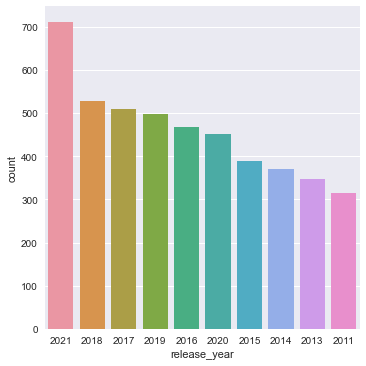

In [25]:
sns.catplot(data=data,x="release_year",order=data["release_year"].value_counts().index[:10],kind="count")

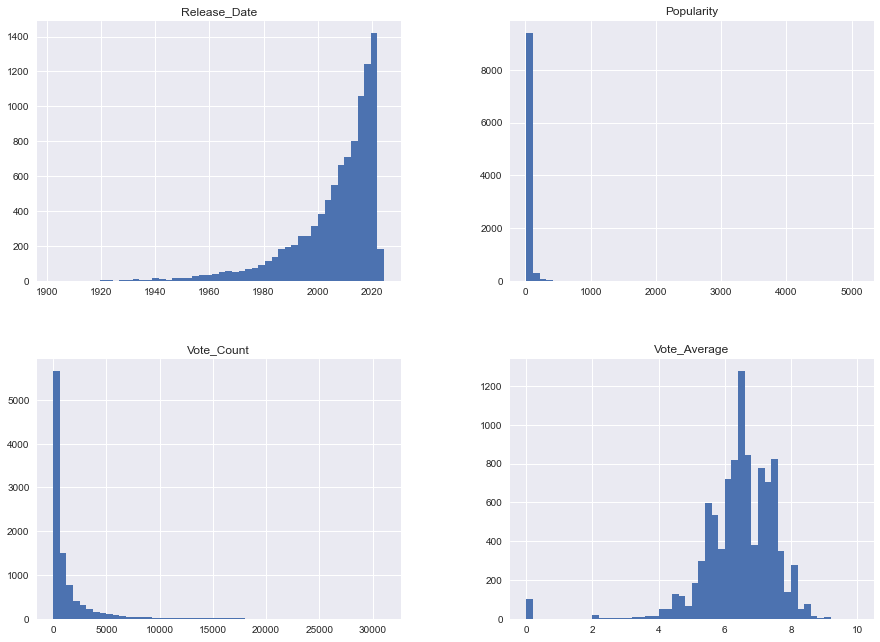

In [26]:
numeric_data.hist(bins = 50,figsize = (15,11));

>as we see from the histogram that


<strong><font color='#2B547E'>released_year</font></strong>that the highst rate of exorted filmse<strong><font color='#2B547E'>1980to2020</font></strong>

<strong><font color='#2B547E'>vote_count</font></strong>that the highst rate 90% of vote_count doesnt exceed 5000

<strong><font color='#2B547E'>Popularity</font></strong>more than 90% less than 1000


<strong><font color='#2B547E'>vote_average</font></strong>the 95% from the rates lay from 4 to 8

<strong><font color='#2B547E'>which language has the most rate in  production?</font></strong>

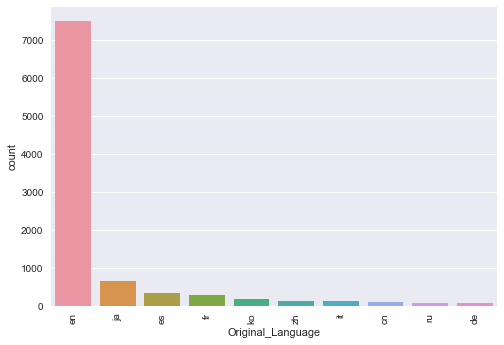

In [27]:
sns.countplot(data=data, x='Original_Language', order=data['Original_Language'].value_counts().index[:10])
plt.xticks(rotation=90);

>as we see that the most movies language is english

In [28]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,release_year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.95,8940.0,8.3,en,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.66,1151.0,8.1,en,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.09,122.0,6.3,en,Thriller,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.20,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.51,1793.0,7.0,en,"Action, Adventure, Thriller, War",2021


<strong><font color='#2B547E'>which kind of movies have the highest rate of production?</font></strong>

In [29]:
filter_kind = data.set_index('Title').Genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filter_kind

Title
Spider-Man: No Way Home                                                                                              Action
Spider-Man: No Way Home                                                                                           Adventure
Spider-Man: No Way Home                                                                                     Science Fiction
The Batman                                                                                                            Crime
The Batman                                                                                                          Mystery
The Batman                                                                                                         Thriller
No Exit                                                                                                            Thriller
Encanto                                                                                                           Animation
En

In [ ]:
plt.figure(figsize=(7,9))
g = sns.countplot(y = filter_kind, order=filter_kind.value_counts().index[:20])
plt.title('Top 20 kind on Hollywood')
plt.xlabel('Titles')
plt.ylabel('kind')
plt.show()

> Hollywood recognizes the following genres of film:
 Action, Adventure, Comedy, Crime and Gangster, Drama, Epics and Historical, Horror, Musicals, Science fiction, War and   Westerns

Now, even though most recently, Hollywood has begun dabbling mostly in Science Fiction and Action Crime, the trends of which genre predominates, changes every decade.

In [ ]:
data2 = data[['Genre','release_year']]
Science_Fiction_year = data2[data2['Genre']=='Science Fiction'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
drama_year = data2[data2['Genre']=='Drama'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
comedy_year = data2[data2['Genre']=='Comedy'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
action_year = data2[data2['Genre']=='Action'].release_year.value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})


In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(data=drama_year, x='year', y='count')
sns.lineplot(data=comedy_year, x='year', y='count')
sns.lineplot(data=action_year, x='year', y='count')
sns.lineplot(data=Science_Fiction_year, x='year', y='count')
ax.set_xticks(np.arange(1902, 2020, 4))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Science_Fiction','Drama','Comedy','Action'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

>In the early 1950s, the highest grossing films were generally comedies. The trend changed as the 1980s progressed, and precedence was slowly given to action films and science fiction.
The early 1990s, saw the emergence of romance films on the top-grossers list. 1995 onwards, the film-scape began to be dominated by science fiction and adventure.
Since then, the winning genre in Hollywood has always been science fiction. Action and Romantic Comedies contest for second. Lately, animation is also becoming a giant.
This is in terms of popularity.
In terms of critic accolades, period dramas and war stories have always ruled.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [ ]:
data["release_month"]=pd.to_datetime(data["Release_Date"]).dt.month
data_month = pd.DataFrame(data.release_month.value_counts()).reset_index().rename(columns={'index':'month','release_month':'count'})
# converting month number to month name
data_month['month_final'] = data_month['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
data_month

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(data=data_month, x='month', y='count')
ax.set_xticks(np.arange(1,13, 1));

>Ending and starting of the year December and January is the best month to release content. The best 4 months to release content are October,  November, December, and cebtember

In [ ]:
data['genre_rate'] = data['Genre'].apply(lambda x: x.split(",")[0]) 


In [ ]:
df=data.groupby(["release_year"])["Title"].count().sort_values(ascending=False)[:5]
df.plot.bar(figsize=(15,8))

>as we see that 2021 has the highest rate of producing films

In [ ]:
#so we are gonna impute with the median bc its not sensative to outlairs
imputing_outlairs("Popularity")